### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [7]:
import sys

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/Users/vinodgattani/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', 200)

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
data = pd.read_csv("Data.csv")
item = pd.read_csv("item.csv")
user = pd.read_csv("user.csv")

In [4]:
data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [5]:
item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [9]:
sys.getsizeof(data)/(1024*1024)

3.051910400390625

In [10]:
data.dtypes

user id      int64
movie id     int64
rating       int64
timestamp    int64
dtype: object

In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None


In [12]:
print(data.shape)

(100000, 4)


In [13]:
print(data.describe())

            user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08


In [14]:
data.isnull().sum(axis=0)

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [15]:
#user
print("\nPrinting Info")
print(user.info())

print("\nData Dimentsion")
print(user.shape)
print("\nData Describe")
print(user.describe())
print("\nData Missing Values")
print(user.isnull().sum())


Printing Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None

Data Dimentsion
(943, 5)

Data Describe
          user id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000

Data Missing Values
user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64


#### 4. Find the number of movies per genre using the item data - 5 marks

In [16]:
item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [17]:
item.columns

Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [18]:
genres = item.columns.values.tolist()[3:]
len(genres)

19

In [19]:
genres

['unknown',
 'Action',
 'Adventure',
 'Animation',
 'Childrens',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [20]:
answer = item[genres].sum(axis=0)

In [21]:
answer

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

In [24]:
name = "vinod"
name.center(30, "#")

'############vinod#############'

In [27]:
name = "vinod"
name.rjust(30, " ")

'                         vinod'

In [30]:
answer

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

In [32]:
for genre, count in answer.iteritems():
    print(genre, count)

unknown 1
Action 251
Adventure 135
Animation 42
Childrens 122
Comedy 505
Crime 109
Documentary 50
Drama 725
Fantasy 22
Film-Noir 24
Horror 92
Musical 56
Mystery 61
Romance 247
Sci-Fi 101
Thriller 251
War 71
Western 27


In [29]:
for i in answer.iteritems():
    print(i)

('unknown', 1)
('Action', 251)
('Adventure', 135)
('Animation', 42)
('Childrens', 122)
('Comedy', 505)
('Crime', 109)
('Documentary', 50)
('Drama', 725)
('Fantasy', 22)
('Film-Noir', 24)
('Horror', 92)
('Musical', 56)
('Mystery', 61)
('Romance', 247)
('Sci-Fi', 101)
('Thriller', 251)
('War', 71)
('Western', 27)


In [28]:
print("Genre".ljust(20, '-'), ">", "Count")
for genre, count in answer.sort_values(ascending=False).iteritems():
    print(genre.ljust(20, "-"), ">", count)

Genre--------------- > Count
Drama--------------- > 725
Comedy-------------- > 505
Thriller------------ > 251
Action-------------- > 251
Romance------------- > 247
Adventure----------- > 135
Childrens----------- > 122
Crime--------------- > 109
Sci-Fi-------------- > 101
Horror-------------- > 92
War----------------- > 71
Mystery------------- > 61
Musical------------- > 56
Documentary--------- > 50
Animation----------- > 42
Western------------- > 27
Film-Noir----------- > 24
Fantasy------------- > 22
unknown------------- > 1


In [34]:
color={'PURPLE': '\x1b[95m',
              'CYAN': '\x1b[96m',
              'DARKCYAN': '\x1b[36m',
              'BLUE': '\x1b[94m',
              'GREEN': '\x1b[92m',
              'YELLOW': '\x1b[93m',
              'RED': '\x1b[91m',
              'BOLD': '\x1b[1m',
              'UNDERLINE': '\x1b[4m',
              'END': '\x1b[0m',}

In [41]:
print(color['UNDERLINE'], (" ").ljust(45))

In [42]:
print("Genre".ljust(40, '-'), ">", "Count")
print(color['UNDERLINE'], (" ").ljust(45), color['END'], "\n")
for genre, count in answer.iteritems():
    print(genre.ljust(40, '-'), ">", count)

Genre----------------------------------- > Count
                                                

unknown--------------------------------- > 1
Action---------------------------------- > 251
Adventure------------------------------- > 135
Animation------------------------------- > 42
Childrens------------------------------- > 122
Comedy---------------------------------- > 505
Crime----------------------------------- > 109
Documentary----------------------------- > 50
Drama----------------------------------- > 725
Fantasy--------------------------------- > 22
Film-Noir------------------------------- > 24
Horror---------------------------------- > 92
Musical--------------------------------- > 56
Mystery--------------------------------- > 61
Romance--------------------------------- > 247
Sci-Fi---------------------------------- > 101
Thriller-------------------------------- > 251
War------------------------------------- > 71
Western--------------------------------- > 27


In [43]:
type(answer)

pandas.core.series.Series

In [44]:
answer = pd.DataFrame(answer).reset_index()

In [45]:
answer.head()

,index,0
0,unknown,1
1,Action,251
2,Adventure,135
3,Animation,42
4,Childrens,122


In [46]:
#answer.reset_index(inplace=True)
answer.columns = ['Genre', 'Count']

In [47]:
answer.sort_values(by='Count', ascending=False, inplace=True)

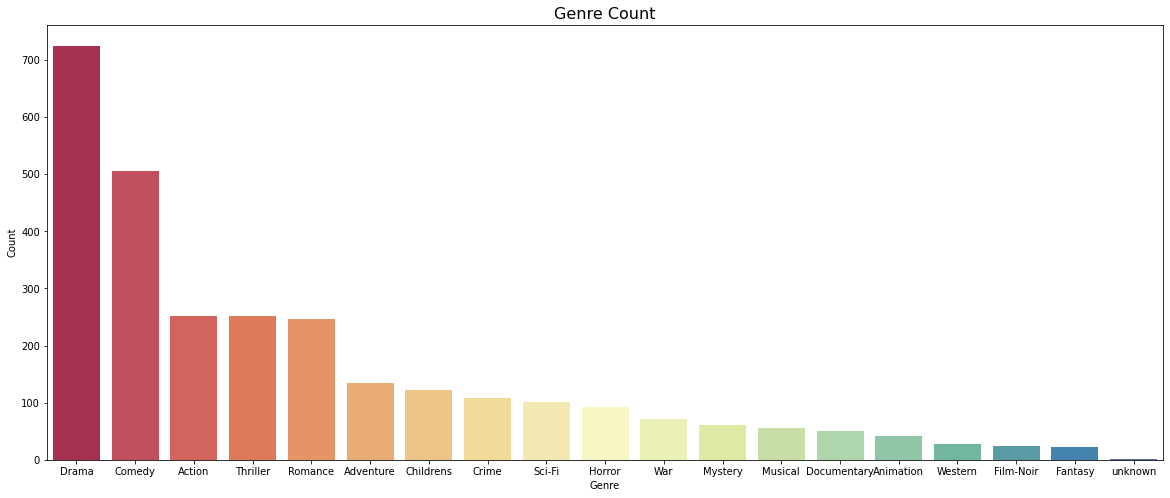

In [48]:
plt.figure(figsize=(20,8))
sns.barplot(x='Genre', y='Count', data=answer, palette='Spectral')
plt.title('Genre Count', fontsize=16)
plt.show()

- genre "Drama" has the highest number of movies

#### 5. Find the movies that have more than one genre - 2.5 marks

In [49]:
#hint: use sum on the axis = 1

In [50]:
item['genre_total'] = item[genres].sum(axis=1)

In [52]:
item.head(2)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre_total
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3


In [53]:
item[item['genre_total'] > 1]['movie title']

0               Toy Story 
1               GoldenEye 
3              Get Shorty 
4                 Copycat 
6          Twelve Monkeys 
               ...        
1667    MURDER and murder 
1668              Tainted 
1671               Mirage 
1677            B. Monkey 
1678        Sliding Doors 
Name: movie title, Length: 849, dtype: object

In [54]:
movies_gt_1_genre = item[item['genre_total'] > 1]['movie title'].tolist()

In [55]:
len(movies_gt_1_genre)

849

In [56]:
type(movies_gt_1_genre)

list

In [59]:
movies_gt_1_genre.sort()

In [60]:
movies_gt_1_genre[0:5]

["'Til There Was You ",
 '101 Dalmatians ',
 '20,000 Leagues Under the Sea ',
 '2001: A Space Odyssey ',
 '3 Ninjas: High Noon At Mega Mountain ']

In [61]:
movies_gt_1_genre[-5:]

['Yankee Zulu ',
 'Young Frankenstein ',
 'Young Guns ',
 'Young Guns II ',
 'Á köldum klaka (Cold Fever) ']

In [57]:
movies_gt_1_genre[0:5]

['Toy Story ', 'GoldenEye ', 'Get Shorty ', 'Copycat ', 'Twelve Monkeys ']

In [58]:
for movie in movies_gt_1_genre:
    print(movie)
    break

Toy Story 


In [62]:
#https://www.pythonforbeginners.com/files/reading-and-writing-files-in-python/

with open("movies_gt_1_genre.txt", "w") as file:
    file.write("movies_gt_1_genre\n")
    for movie in movies_gt_1_genre:
        file.write(f"{movie}\n")

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [63]:
a = item['unknown']!=1

In [65]:
type(a)

pandas.core.series.Series

In [66]:
a

0       True
1       True
2       True
3       True
4       True
        ... 
1676    True
1677    True
1678    True
1679    True
1680    True
Name: unknown, Length: 1681, dtype: bool

In [ ]:
a = item['unknown']!=1
b = item[a]

In [68]:
item = item[item['unknown']!=1]

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [ ]:
#your answers here

- Count of movies with rating 4 is largest

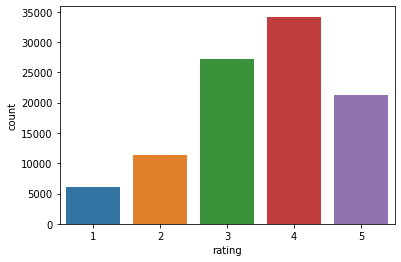

In [69]:
sns.countplot(data['rating'])
plt.show()

Age is right skewed

In [71]:
user.skew()

user id    0.000000
age        0.605382
dtype: float64

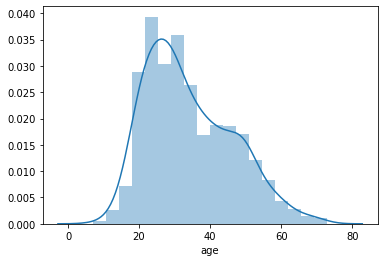

In [70]:
sns.distplot(user['age'])
plt.show()

In [72]:
item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre_total
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3


In [ ]:
item['release year'] = item['release date'].str[-4:].astype('int')

In [75]:
item.dtypes

movie id                 int64
movie title             object
release date            object
unknown                  int64
Action                   int64
Adventure                int64
Animation                int64
Childrens                int64
Comedy                   int64
Crime                    int64
Documentary              int64
Drama                    int64
Fantasy                  int64
Film-Noir                int64
Horror                   int64
Musical                  int64
Mystery                  int64
Romance                  int64
Sci-Fi                   int64
Thriller                 int64
War                      int64
Western                  int64
genre_total              int64
release_year    datetime64[ns]
dtype: object

In [74]:
item['release_year'] = pd.to_datetime(item['release date'])

In [88]:
temp_df = pd.DataFrame({"date":["1 January 90"]})

In [89]:
pd.to_datetime(temp_df['date'])

0   1990-01-01
Name: date, dtype: datetime64[ns]

In [76]:
item['release_year'] = pd.to_datetime(item['release date']).dt.year

In [78]:
from datetime import datetime

In [79]:
datetime.strptime('20-Jan-2019', '%d-%b-%Y')

datetime.datetime(2019, 1, 20, 0, 0)

In [80]:
item['release_date'] = item['release date'].apply(lambda x: datetime.strptime(x, '%d-%b-%Y'))

In [81]:
item['release_year'] = item['release_date'].dt.year

In [82]:
item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre_total,release_year,release_date
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1995,1995-01-01
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,1995,1995-01-01
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1995,1995-01-01
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3,1995,1995-01-01
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3,1995,1995-01-01


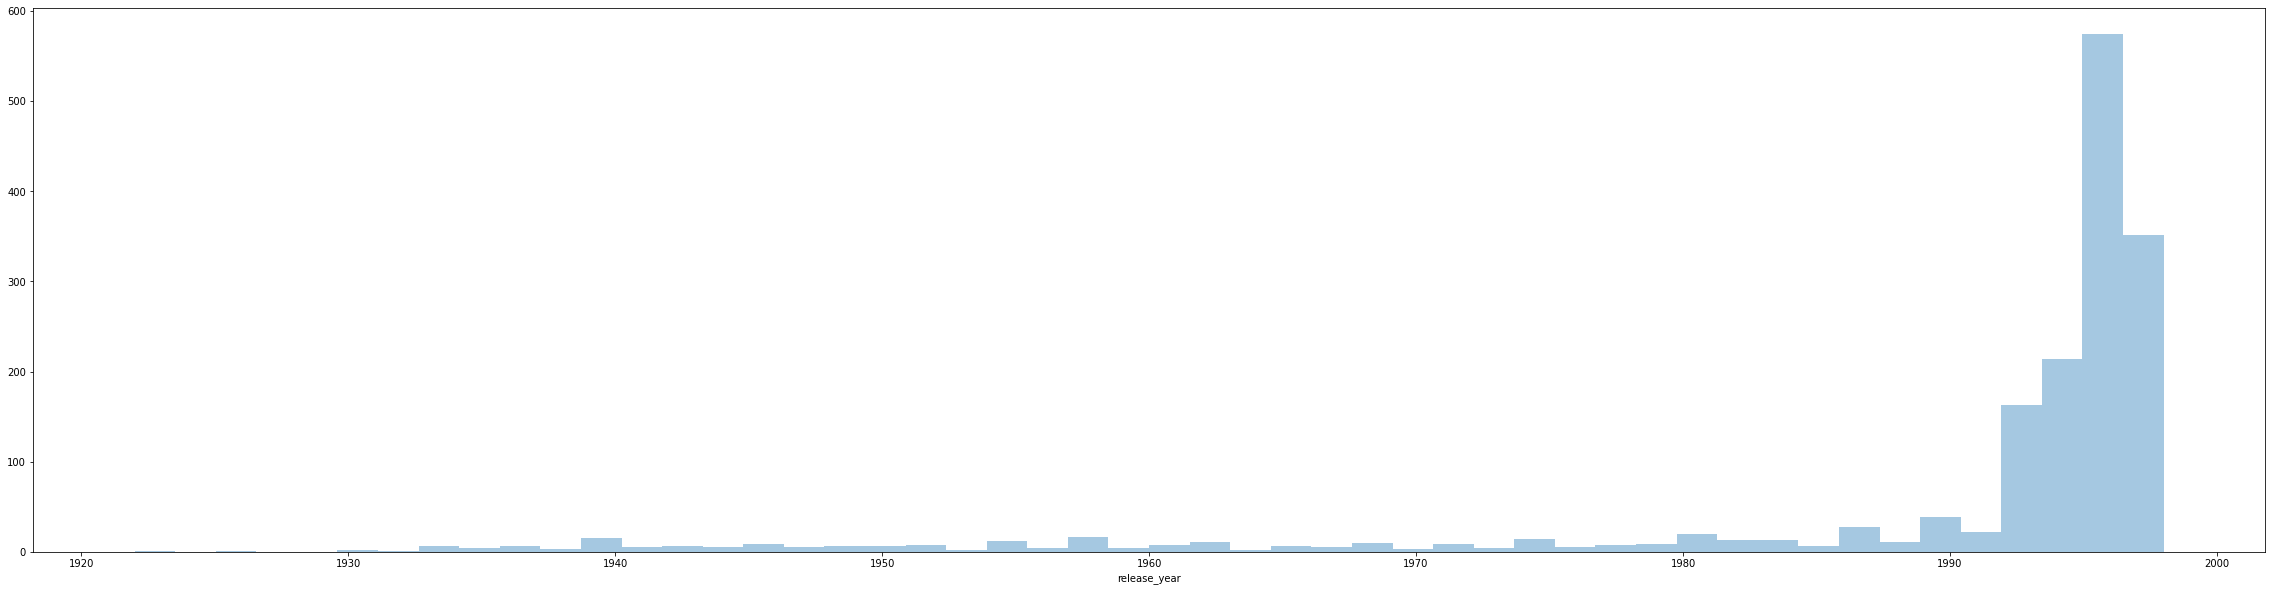

In [91]:
plt.figure(figsize=(40,10))
sns.distplot(item['release_year'],kde=False)
plt.show()

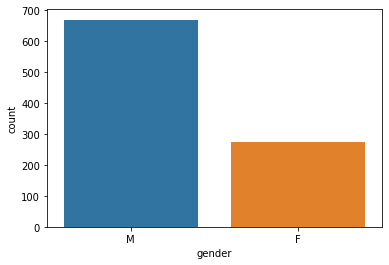

In [92]:
sns.countplot(user['gender'])
plt.show()

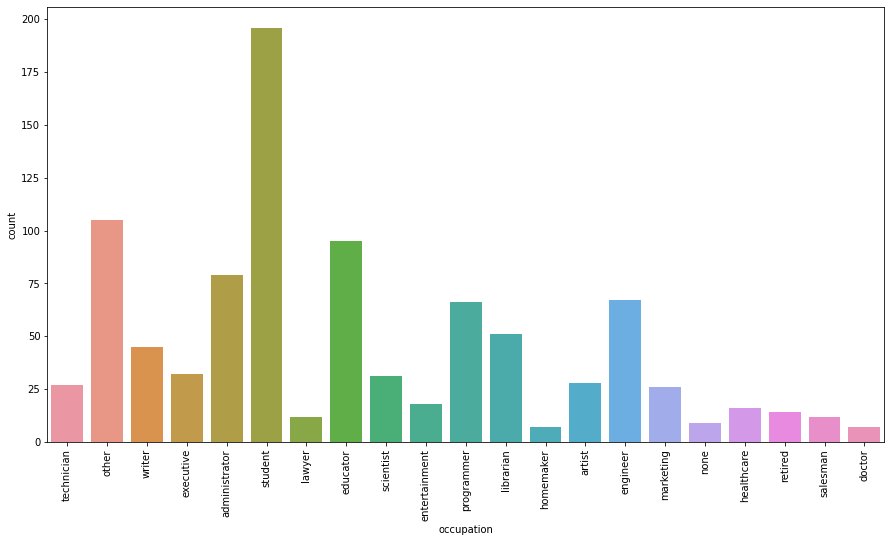

In [93]:
plt.figure(figsize=(15,8))
sns.countplot(user['occupation'])
plt.xticks(rotation=90)

plt.show()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [ ]:
item.head()

In [94]:
genre_by_year = item.groupby('release_year')[genres].sum()

In [95]:
genre_by_year.head()

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
drama = [1,2,3,4,100]

In [100]:
genre_by_year['Drama']

release_year
1922      0
1926      1
1930      1
1931      0
1932      0
1933      0
1934      1
1935      0
1936      1
1937      1
1938      1
1939      5
1940      0
1941      3
1942      2
1943      1
1944      0
1945      1
1946      3
1947      1
1948      0
1949      2
1950      3
1951      2
1952      0
1953      0
1954      3
1955      3
1956      2
1957      5
1958      4
1959      1
1960      2
1961      2
1962      2
1963      1
1964      0
1965      1
1966      1
1967      5
1968      2
1969      0
1970      1
1971      1
1972      2
1973      2
1974      2
1975      1
1976      2
1977      0
1978      1
1979      3
1980      3
1981      2
1982      6
1983      1
1984      5
1985      3
1986      8
1987      5
1988      3
1989      8
1990     12
1991     11
1992     14
1993     64
1994     97
1995     89
1996    170
1997    113
1998     33
Name: Drama, dtype: int64

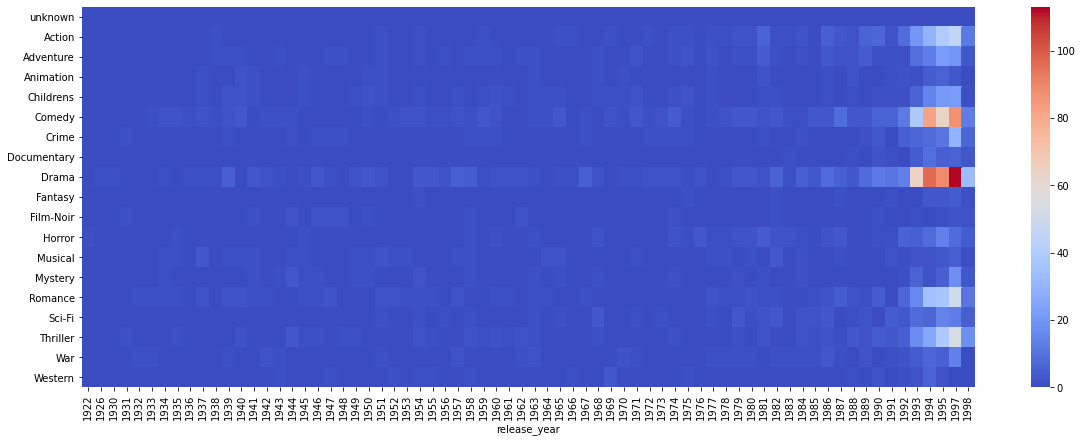

In [101]:
plt.figure(figsize=(20,7))  #setting the figure size
sns.heatmap(genre_by_year[genre_by_year.index != 1996].T, cmap='coolwarm', robust=False)  #heat map to plot the above table
plt.show()



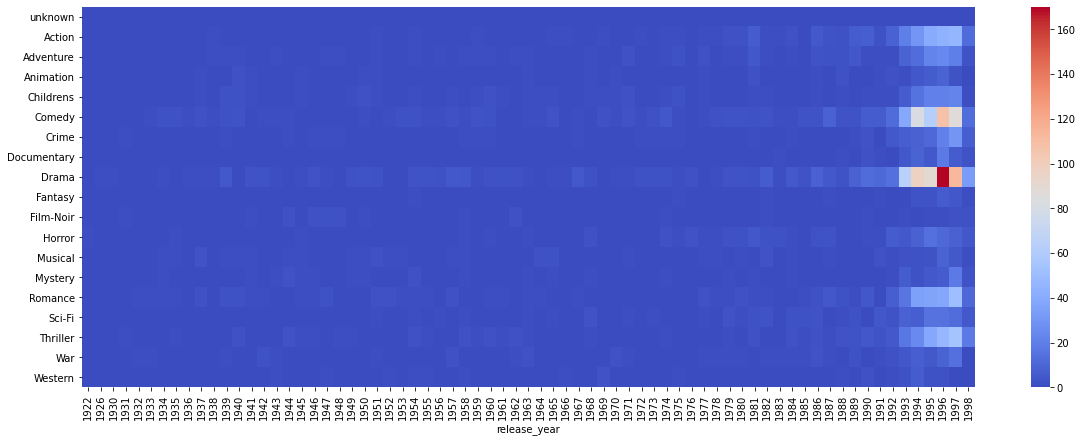

In [98]:
plt.figure(figsize=(20,7))  #setting the figure size
sns.heatmap(genre_by_year.T, cmap='coolwarm', robust=False)  #heat map to plot the above table
plt.show()

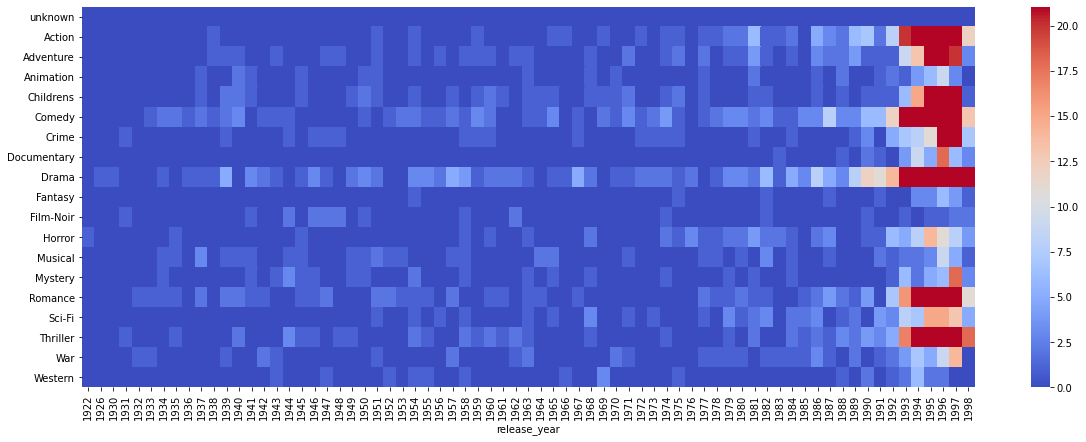

In [97]:

plt.figure(figsize=(20,7))  #setting the figure size
sns.heatmap(genre_by_year.T, cmap='coolwarm', robust=True)  #heat map to plot the above table
plt.show()

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [ ]:
#sanity check
#Each user has rated a movie only once

In [103]:
grouped_df = data.groupby(by='movie id').agg({"rating":['count',
                                                       'mean']})

In [104]:
grouped_df.head()

rating          
          count      mean
movie id                 
1           452  3.878319
2           131  3.206107
3            90  3.033333
4           209  3.550239
5            86  3.302326

In [105]:
grouped_df.columns

MultiIndex([('rating', 'count'),
            ('rating',  'mean')],
           )

In [106]:
grouped_df = grouped_df[grouped_df[('rating','count')]>100]

In [107]:
grouped_df.sort_values(by=('rating','mean'), ascending=False, inplace=True)

In [108]:
grouped_df = grouped_df.head(25)

In [109]:
grouped_df.head()

rating          
          count      mean
movie id                 
408         112  4.491071
318         298  4.466443
169         118  4.466102
483         243  4.456790
64          283  4.445230

In [110]:
grouped_df.reset_index(inplace=True)

In [111]:
grouped_df.head()

movie id rating          
            count      mean
0      408    112  4.491071
1      318    298  4.466443
2      169    118  4.466102
3      483    243  4.456790
4       64    283  4.445230

In [112]:
grouped_df.columns = ['movie id', 'rating_count', 'rating_mean']

In [113]:
grouped_df.head()

,movie id,rating_count,rating_mean
0,408,112,4.491071
1,318,298,4.466443
2,169,118,4.466102
3,483,243,4.456790
4,64,283,4.445230


In [114]:
grouped_df = grouped_df.merge(item[['movie id', 'movie title']],
                             on='movie id',
                             how='inner')

In [115]:
grouped_df.head()

,movie id,rating_count,rating_mean,movie title
0,408,112,4.491071,"Close Shave, A"
1,318,298,4.466443,Schindler's List
2,169,118,4.466102,"Wrong Trousers, The"
3,483,243,4.456790,Casablanca
4,64,283,4.445230,"Shawshank Redemption, The"


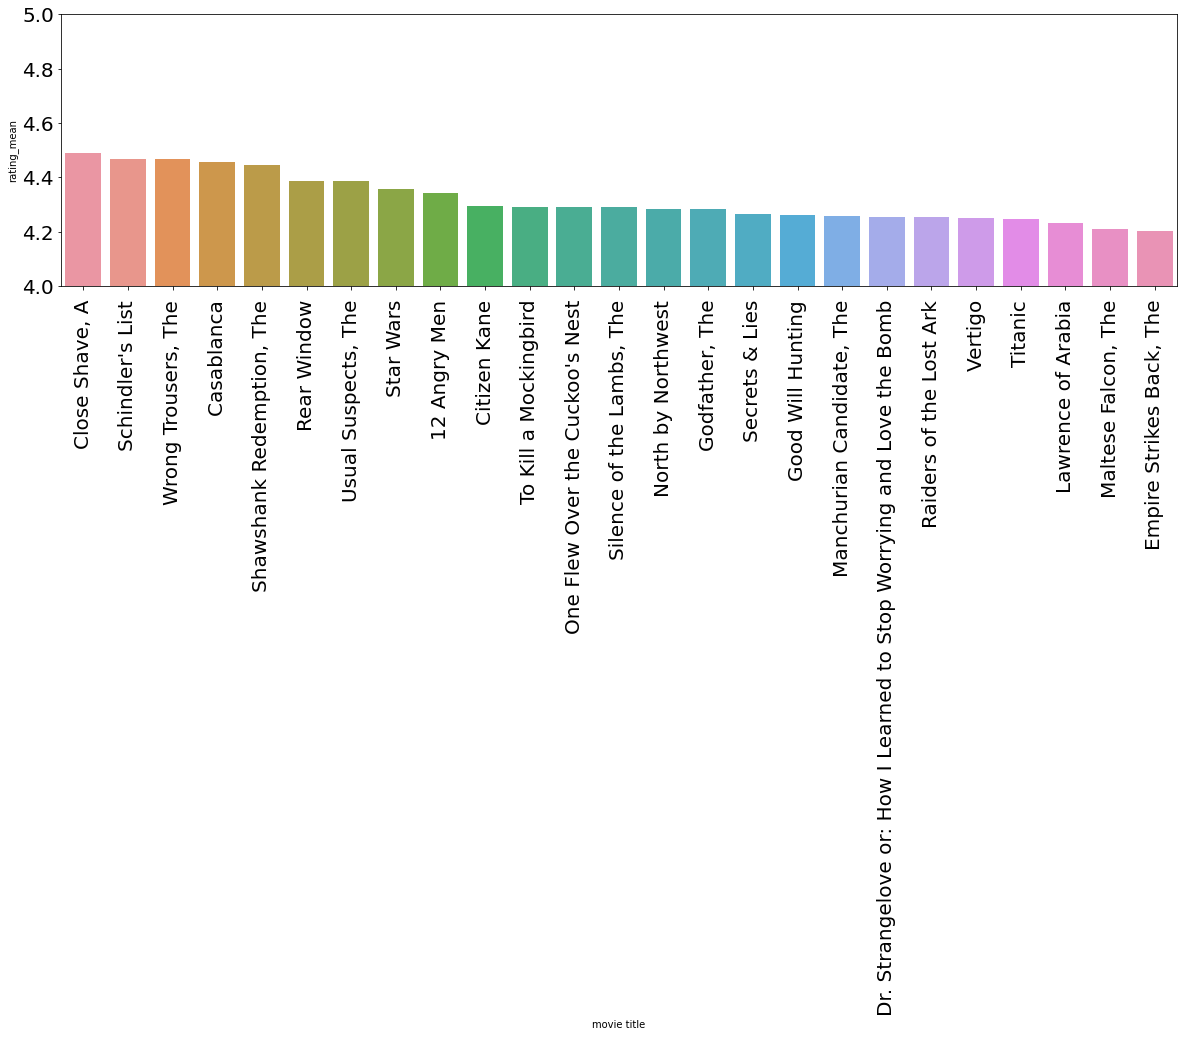

In [116]:
plt.figure(figsize=(20,5))
sns.barplot(x='movie title',
           y = 'rating_mean',
           data=grouped_df)
plt.xticks(rotation=90, fontsize=20)
plt.yticks( fontsize=20)
plt.ylim(4, 5)
plt.show()

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [ ]:
user.head()

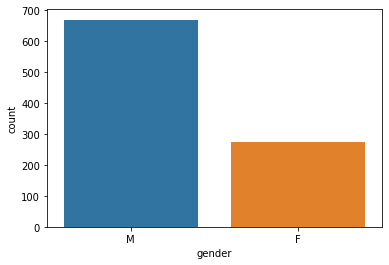

In [117]:
sns.countplot(user['gender'])

In [ ]:
data.head()

In [118]:
df = data.merge(user[['user id','gender']], on='user id')
len(df)

100000

In [119]:
df.head()

,user id,movie id,rating,timestamp,gender
0,196,242,3,881250949,M
1,196,393,4,881251863,M
2,196,381,4,881251728,M
3,196,251,3,881251274,M
4,196,655,5,881251793,M


In [120]:
grouped_df = pd.DataFrame(df['gender'].value_counts())

In [121]:
grouped_df.columns = ['Total']

In [125]:
grouped_df

,Total
M,74260
F,25740


In [122]:
df = df.merge(item, on='movie id')

In [123]:
_grouped_df = df.groupby('gender')[['Drama', 'Sci-Fi', 'Romance']].agg('sum')

In [126]:
_grouped_df

,Drama,Sci-Fi,Romance
gender,,,
F,11008,2629,5858
M,28887,10101,13603


In [127]:
grouped_df = grouped_df.merge(_grouped_df,
                              left_index=True,
                              right_index=True,)

In [128]:
grouped_df.head()

,Total,Drama,Sci-Fi,Romance
M,74260,28887,10101,13603
F,25740,11008,2629,5858


In [129]:
output_df = grouped_df[['Drama', 'Sci-Fi', 'Romance']].div(grouped_df['Total'], axis=0)

In [130]:
output_df.head()

,Drama,Sci-Fi,Romance
M,0.388998,0.136022,0.183181
F,0.427661,0.102137,0.227584


In [131]:
output_df1 = output_df.reset_index()

In [132]:
output_df1.head()

,index,Drama,Sci-Fi,Romance
0,M,0.388998,0.136022,0.183181
1,F,0.427661,0.102137,0.227584


In [133]:
output_df2 = output_df1.melt(id_vars = ['index'], value_vars=['Drama', 'Sci-Fi', 'Romance'])

In [134]:
output_df2

,index,variable,value
0,M,Drama,0.388998
1,F,Drama,0.427661
2,M,Sci-Fi,0.136022
3,F,Sci-Fi,0.102137
4,M,Romance,0.183181
5,F,Romance,0.227584


In [138]:
output_df2.columns = ['gender', 'genre', 'value']

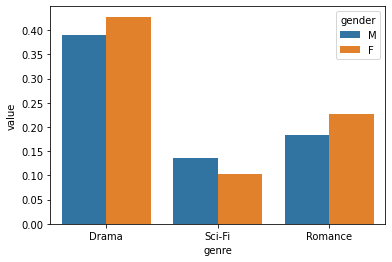

In [139]:
sns.barplot(x='genre', y='value', hue='gender', data=output_df2)
plt.show()

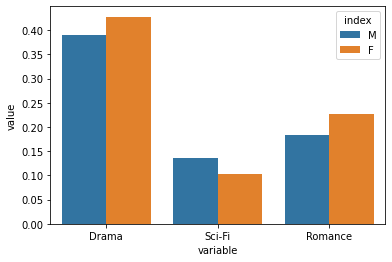

In [137]:
sns.barplot(x='variable', y='value', hue='index', data=output_df2)
plt.show()

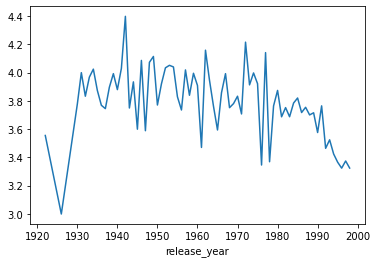

In [140]:
df.groupby(by='release_year')['rating'].agg('mean').plot()

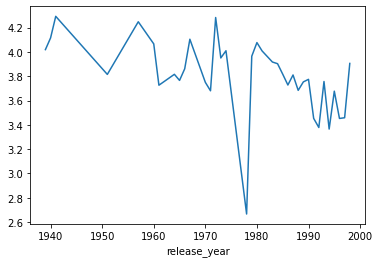

In [141]:
g1 = df['movie id'].value_counts()
g1 = g1[g1>100]

df[df['movie id'].isin(g1)].groupby(by='release_year')['rating'].agg('mean').plot()

In [142]:
grouped = df.groupby(by='movie id')['rating'].agg(['count','mean'])

In [143]:
grouped.head()

,count,mean
movie id,,
1,452,3.878319
2,131,3.206107
3,90,3.033333
4,209,3.550239
5,86,3.302326


In [144]:
grouped.corr()

,count,mean
count,1.000000,0.429734
mean,0.429734,1.000000


In [ ]:
grouped['bin'] = pd.qcut(grouped['count'], q=5)

In [ ]:
grouped.groupby(by='bin')['mean'].agg(['count','mean'])

In [ ]:
-zunk ratings
-pre-approved users
-rating received too late | should carry less weights
-mass rating

In [ ]:
#how ratings have evolved over time
#do you see any bias - What is bias? - Or the movies have become good?

#which month movie releases most
#any impact of rating on release month - 
    #can we simply do groupby by month

In [ ]:
[5,4,3]

[20, 0.1, 3]

[5*20 + 4*0.1 + 3*3]/(20+0.1+3)

In [ ]:
average of all ratings

rating_by_individual = rating*(weight_individual)

In [ ]:
#deliberate mass rating - check by time (outlier treatment)
#because of social media - this has become an frequent 
#IMDB - How do they treat bias?

In [ ]:
#how age and gender rating have evolved over time

In [ ]:
#how do different age, gender and occumpation is impacting movie rating
#which movies they see


In [ ]:
#interesting EDAs

### Links

https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#ratings


https://app.datawrapper.de/map/xY5is/data#


https://github.com/Shreyas3108/movielens-analytics-recomendation/blob/master/Movielens%20Data%20analysis%20and%20recomendation%20system%20.ipynb


https://github.com/WJMatthew/MovieLens-EDA

### EDA

Part I (Age)
    1. Impact of age on Rating
    2. Impact of age on Type of movies they see
    3. Do it here
    
Part II (year)

    1. 
    2.
    
part III (Age*Year)

In [ ]:


user.head()